# Housing Sales Data Werkcollege

### Goal: in this notebook you will learn how to access the property price data needed for the final assignment

The assignment itself will be released on Canvas later this week. This werkcollege material is intended for you to become familiar with the dataset before working on it in the assignment.

#### Property prices Dataset 
The housing sales data was acquired from the public NYC Geodatabase. This dataset provides geocoded data on real estate 
sales in New York City from the year 2015. This Geodatabase is based on annual sales reports collected by the New York City Department of Finance. All records are provided with longitude and latitude coordinates using the NAD83 geodetic datum as their reference point. Next to the location, the data provides information on the properties as well as the selling price. In total, the dataset contains 30 attributes including information on both sale and property level.

The original dataset and further details can be found [here](https://geo.nyu.edu/catalog/nyu-2451-34678). It is in the shapefile (.shp) format. This shapefile is a simple, nontopological data format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas) - in this dataset it is points. To read, modify and convert the .shp file, we used the [geopandas](http://geopandas.org/) package. Geopandas allows us to work with geospatial data in python. That is, GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

For the assignment, we recommend you use the slightly modified version of the original dataset provided on Canvas. In this file, we converted the original .shp file (shapefile) into a .csv and removed some dimensions from it. The dimensions were removed mostly to enhance results. You are free to use the original unmodified dataset to see why we made these changes, if you so wish.

#### Packages needed to run this notebook:
- [pandas](https://anaconda.org/anaconda/pandas)
- [numpy](https://anaconda.org/anaconda/numpy)
- [sklearn](https://anaconda.org/anaconda/scikit-learn)
- [matplotlib](https://anaconda.org/conda-forge/matplotlib)
- [seaborn](https://anaconda.org/conda-forge/seaborn)
- [pillow](https://anaconda.org/conda-forge/pillow)
- [keras](https://anaconda.org/conda-forge/keras)

 #### Interacting with the dataset

We start with importing the .csv file containing the sales data.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales_data_2015.csv', index_col=0, low_memory=False)

df.head()

Sale_id   bbl_id  year  borough                 bldg_ctgy tax_cls_p  block  \
0        1  2290528  2015        2  01  ONE FAMILY DWELLINGS         1   2905   
1        2  2290528  2015        2  01  ONE FAMILY DWELLINGS         1   2905   
2        3   230352  2015        2  01  ONE FAMILY DWELLINGS         1   3035   
3        4  2303936  2015        2  01  ONE FAMILY DWELLINGS         1   3039   
4        5  2303936  2015        2  01  ONE FAMILY DWELLINGS         1   3039   

   lot easmnt bldg_cls_p  ... land_sqft tot_sqft  yr_built  tax_cls_s  \
0   28    NaN         A9  ...      4750     2619      1899          1   
1   28    NaN         A9  ...      4750     2619      1899          1   
2    2    NaN         S1  ...      1287     2528      1899          1   
3   36    NaN         S1  ...      2500     2452      1910          1   
4   36    NaN         S1  ...      2500     2452      1910          1   

   bldg_cls_s   sale_date   price  usable       long        lat  
0          A9    08-07-15       0       N -73.901338  40.841229  
1          A9    08-07-15       0       N -73.901338  40.841229  
2          S1  12/18/2015       0       N -73.898331  40.848648  
3          S1  08/18/2015       0       N -73.893338  40.856136  
4          S1    07-01-15  400000       Y -73.893338  40.856136  

[5 rows x 26 columns]

The data has 26 dimensions, which are listed below.
Some of the attribute names are quite ambiguous, such are the codes for tax and building classes. For more information you can have a look at

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

and 

https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html .

Next we check how big the dataset is and how many entries we got

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84768 entries, 0 to 84767
Data columns (total 26 columns):
Sale_id       84768 non-null int64
bbl_id        84768 non-null int64
year          84768 non-null int64
borough       84768 non-null int64
bldg_ctgy     84768 non-null object
tax_cls_p     84765 non-null object
block         84768 non-null int64
lot           84768 non-null int64
easmnt        1 non-null object
bldg_cls_p    84765 non-null object
address       84768 non-null object
apt           20983 non-null object
zip           84768 non-null int64
res_unit      84768 non-null int64
com_unit      84768 non-null int64
tot_unit      84768 non-null int64
land_sqft     84768 non-null int64
tot_sqft      84768 non-null int64
yr_built      84768 non-null int64
tax_cls_s     84768 non-null int64
bldg_cls_s    84768 non-null object
sale_date     84768 non-null object
price         84768 non-null int64
usable        84768 non-null object
long          84768 non-null float64
lat      

#### Using a linear regression model to predict house price

We are going to fit a simple linear regression model on the data, using the property age and total area as independent and price as dependent variable. 

In [3]:
df2 = df[['yr_built', 'tot_sqft', 'price']].copy()
df2.head()

yr_built  tot_sqft   price
0      1899      2619       0
1      1899      2619       0
2      1899      2528       0
3      1910      2452       0
4      1910      2452  400000

First, we do some basic cleaning, that is removing NaN and zero-values.

In [4]:
# Checking for NaN values
df2.isna().sum().sort_values(ascending=False)

price       0
tot_sqft    0
yr_built    0
dtype: int64

In [5]:
# We also don't want any attibute to be 0, which is presumably a missing entry
print("Entries with incorrect year: ", len(df2[df2.yr_built == 0]))
print("Entries with incorrect totsqft: ", len(df2[df2.tot_sqft == 0]))
print("Entries with incorrect price: ",len(df2[df2.price == 0]))
print("Original dataset length: ",len(df2))
df2 = df2[(df2.yr_built != 0) & (df2.tot_sqft != 0) & (df2.price != 0)]
print("Cleaned dataset length: ", len(df2))

Entries with incorrect year:  6530
Entries with incorrect totsqft:  40639
Entries with incorrect price:  24118
Original dataset length:  84768
Cleaned dataset length:  28711


In [6]:
#Check that the cleaning steps worked
print(len(df2[df2.yr_built == 0]))
print(len(df2[df2.tot_sqft == 0]))
print(len(df2[df2.price == 0]))

0
0
0


Before we can continue, we need to divide the data into a format readable by scikit-learn. This is to make a set of source variables X (i.e. Year built, Total sqft) and targets Y (i.e. Price). 

In [7]:
# Assigning X to age and size and Y to price

X = df2.drop(columns=['price'])
Y = df2.price
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(28711, 2) (28711,)


Next, we'll investigate the relationship between the variables visually...

Text(0.5, 1.0, 'Prices vs Total sqft')

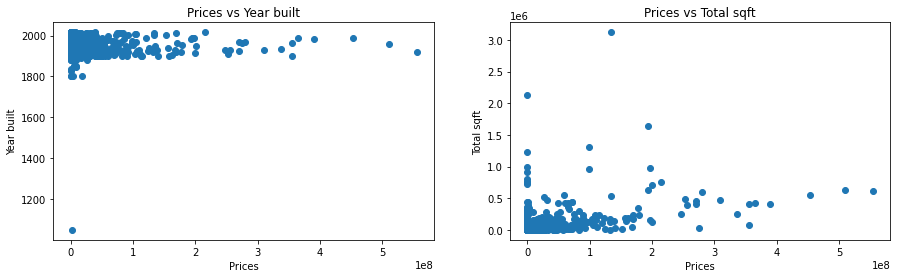

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1, 2)
f.set_figwidth(15,10)
ax[0].scatter(Y, X.yr_built)
ax[0].set_xlabel("Prices")
ax[0].set_ylabel("Year built")
ax[0].set_title("Prices vs Year built")
#ax[0].set_xlim(0,5e8)
#ax[0].set_ylim(1800,2050)
ax[1].scatter(Y, X.tot_sqft)
ax[1].set_xlabel("Prices")
ax[1].set_ylabel("Total sqft")
ax[1].set_title("Prices vs Total sqft")
#ax[1].set_xlim(0,5e8)
#ax[1].set_ylim(0,1e6)

...and statistically.

In [9]:
print('Correlation matrix for Price and Year built: \n \n', np.corrcoef(Y, X.yr_built))
print('\n \n Correlation matrix for Price and Total sqft: \n \n', np.corrcoef(Y, X.tot_sqft))

Correlation matrix for Price and Year built: 
 
 [[ 1.         -0.01445196]
 [-0.01445196  1.        ]]

 
 Correlation matrix for Price and Total sqft: 
 
 [[1.         0.43755973]
 [0.43755973 1.        ]]


It seems that there is a slightly negative correlation between price and property age, i.e. the price tends to decrease the newer the building (= larger value for year built). On the other hand, a larger property size has a moderately high correlation with an to increase the price.

Now, we will split the data and fit the model.

In [10]:
# Splitting the data with 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
X_train.shape, X_test.shape

((22968, 2), (5743, 2))

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [12]:
# Fitting the model

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As we have fit the model, we want to know how well it can explain the variance in price, that is, we calculate the r-squared value for both the training as well as the test set. We look at the R^2 scores for both the training and test sets.

In [13]:
# R^2 scores
print('Train:', lr.score(X_train, y_train))
print('Test:', lr.score(X_test, y_test))

Train: 0.1996230648628108
Test: 0.18439313336989027


R^2 values are rather low, indicating not much of the total price variance is explained by this linear model. But, at least the model does not show any obviously suspicious behavior: R^2 values are between 0 and 1, with train-set data explained slightly better by the model than test-set data, as one might suspect. 

We can furthermore investigate how far the difference between predicted and actual price varies as a function of price

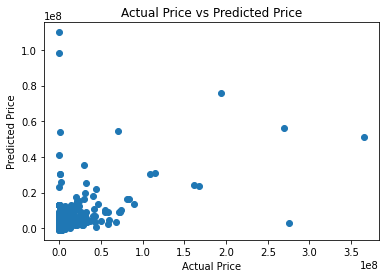

In [14]:
#linear space
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

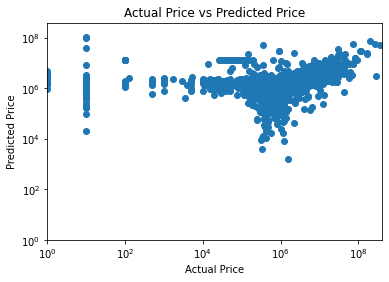

In [15]:
#log space
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.xlim(1,4e8)
plt.ylim(1,4e8)
plt.xscale('log')
plt.yscale('log')
plt.show()

From the plot we see that there does not seem to be some correlation between predicted and real prices, but only within limited ranges. What oddities can you in the dataset are illustrated by these figures? Think about how you will deal with them in the assignment.

Another way to interpret our regression model is looking at the residual plot. In this plot, each point is one house price (observation), the prediction made by the model is on the x-axis and the residual of the prediction is on the y-axis. This distance from the line at 0 is how far off the prediction was for that value.

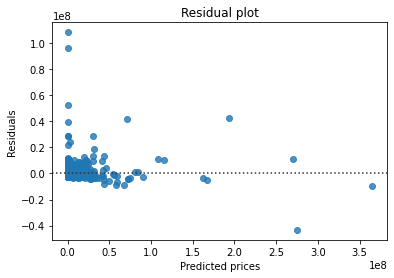

In [16]:
import seaborn

seaborn.residplot(y_test, lr.predict(X_test))
plt.xlabel("Predicted prices")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

The residual plot indicates that there the y-axis of our dataset might be imbalanced. It furthermore seems like there are quite a few outliers in the data. Let's now check the Mean Absolute Error.

Mean Absolute Error is given by 
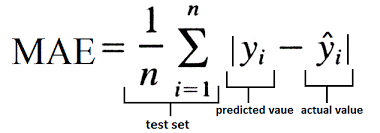


and basically captures the absolute difference between predicted and true target variables. Remember that prices are provided in US-Dollars.


In [17]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, lr.predict(X_test)))

MAE: 1994993.2540836434


Let's compare this to a random prediction, where we simply subtract the mean price from every individual housing price and average over the results.

In [18]:
abs(y_test - y_test.mean()).mean()

2074559.7523963416

So, our model slightly outperforms a random prediction by this metric, but overall it seems that these two features alone do not yield much information about housing prices, at least when used in a linear regression model. Also, prices seem to be quite unbalanced and containing some outliers.

## To do:

1) Try to see if you can make a better fit than this, using the full dataset. Now you are tuning hyperparameters, the first thing you should do is make a proper train/validation/test data split. You can then tune your analysis on the validation data.  Do your results generalise from the validation set to the test set? Next, you could try removing different kinds of bad or extreme entries in the dataset, and see how it affects the results.

2) What other information could you use to augment this dataset? For example, look at the list of information sources here: https://github.com/CityOfNewYork/nyc-geo-metadata  . What information could be relevant (correlated) with property price? How could you use include this information in the table above?

# Image Features

The cost of a property do not only depend on its tangible characteristics, such as its size or number of bathrooms, but also on its intangible and contextual assets, like its location, access to public transport networks and neighbourhood safety. Beyond this, aesthetic aspects, that is the “look and feel” of a property and its neighborhood can impact the valuation of a house or property. It might therefore be a good approach to look at both the properties’ tangible assets as well as this contextual information. 

In this project, contextual information is going to be provided in the form of satellite imagery. These images have the potential to give us insight into the features of a properties’ direct surroundings. Specifically, we will use features extracted from images from a (pretrained) Convolutional Neural Network (CNN).


#### Aerial images dataset
Aerial imagery is provided by the New York City Department of Information Technology & Telecommunications. Images are captured every two years during spring and summer months and cover the entire state of New York. We include the most recent images, which means 2018 in our case. Before being published, the images have been corrected to remove distortions caused by elevation changes and camera angles. Images are provided as four-band raster files in the .jp2 format and contain meta-information such as the geo-location of each image pixel, which is in a similarly projected coordinate system to the real estate sales data.

Link to the original image dataset: https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_AerialImagery.md

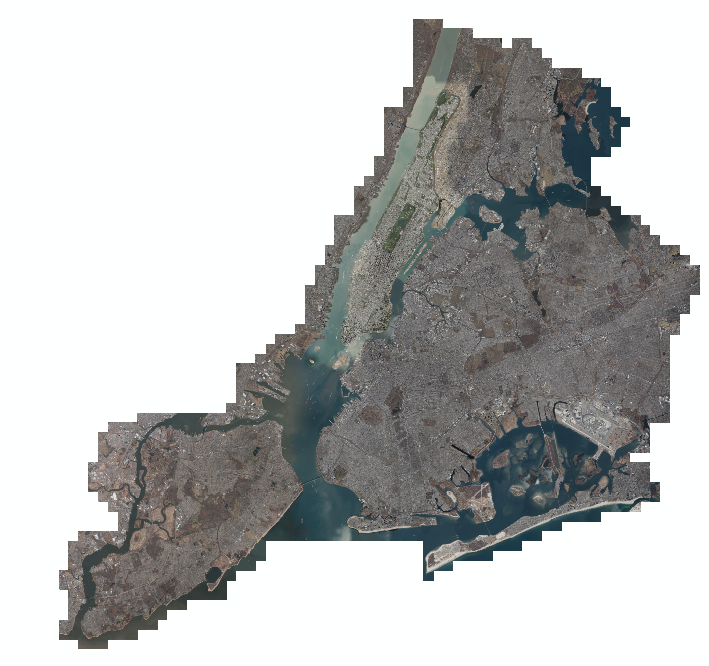

In order to generate a set of satellite images matching the locations of the sold houses, the .jp2 files from this dataset were first merged into a three-band (RGB) raster dataset, which when combined looks like the image above. In this file, each pixel corresponds to specicific geographic coordinates. 

With this file, for each house in the dataaset, a square image is cut from this mosaic. Th tile square has the house at its centre point and its surroundings are within a 500ft radius. More precisely, we take the house's coordinates and create a bounding box around them, where we set the size of the box to 1001x1001 feet. This bounding box is then used as a mask() function, which cuts out the part of the raster file which we are interested in. 

The resulting images are stored as colored .jpg files, with size set to 2000x2000 (pixels, not feet).  

For these operations, we used the [rasterio](https://rasterio.readthedocs.io/en/stable/api/rasterio.html) package, which allows us to read and process .jp2 files.

An example from the generated images looks like the below:

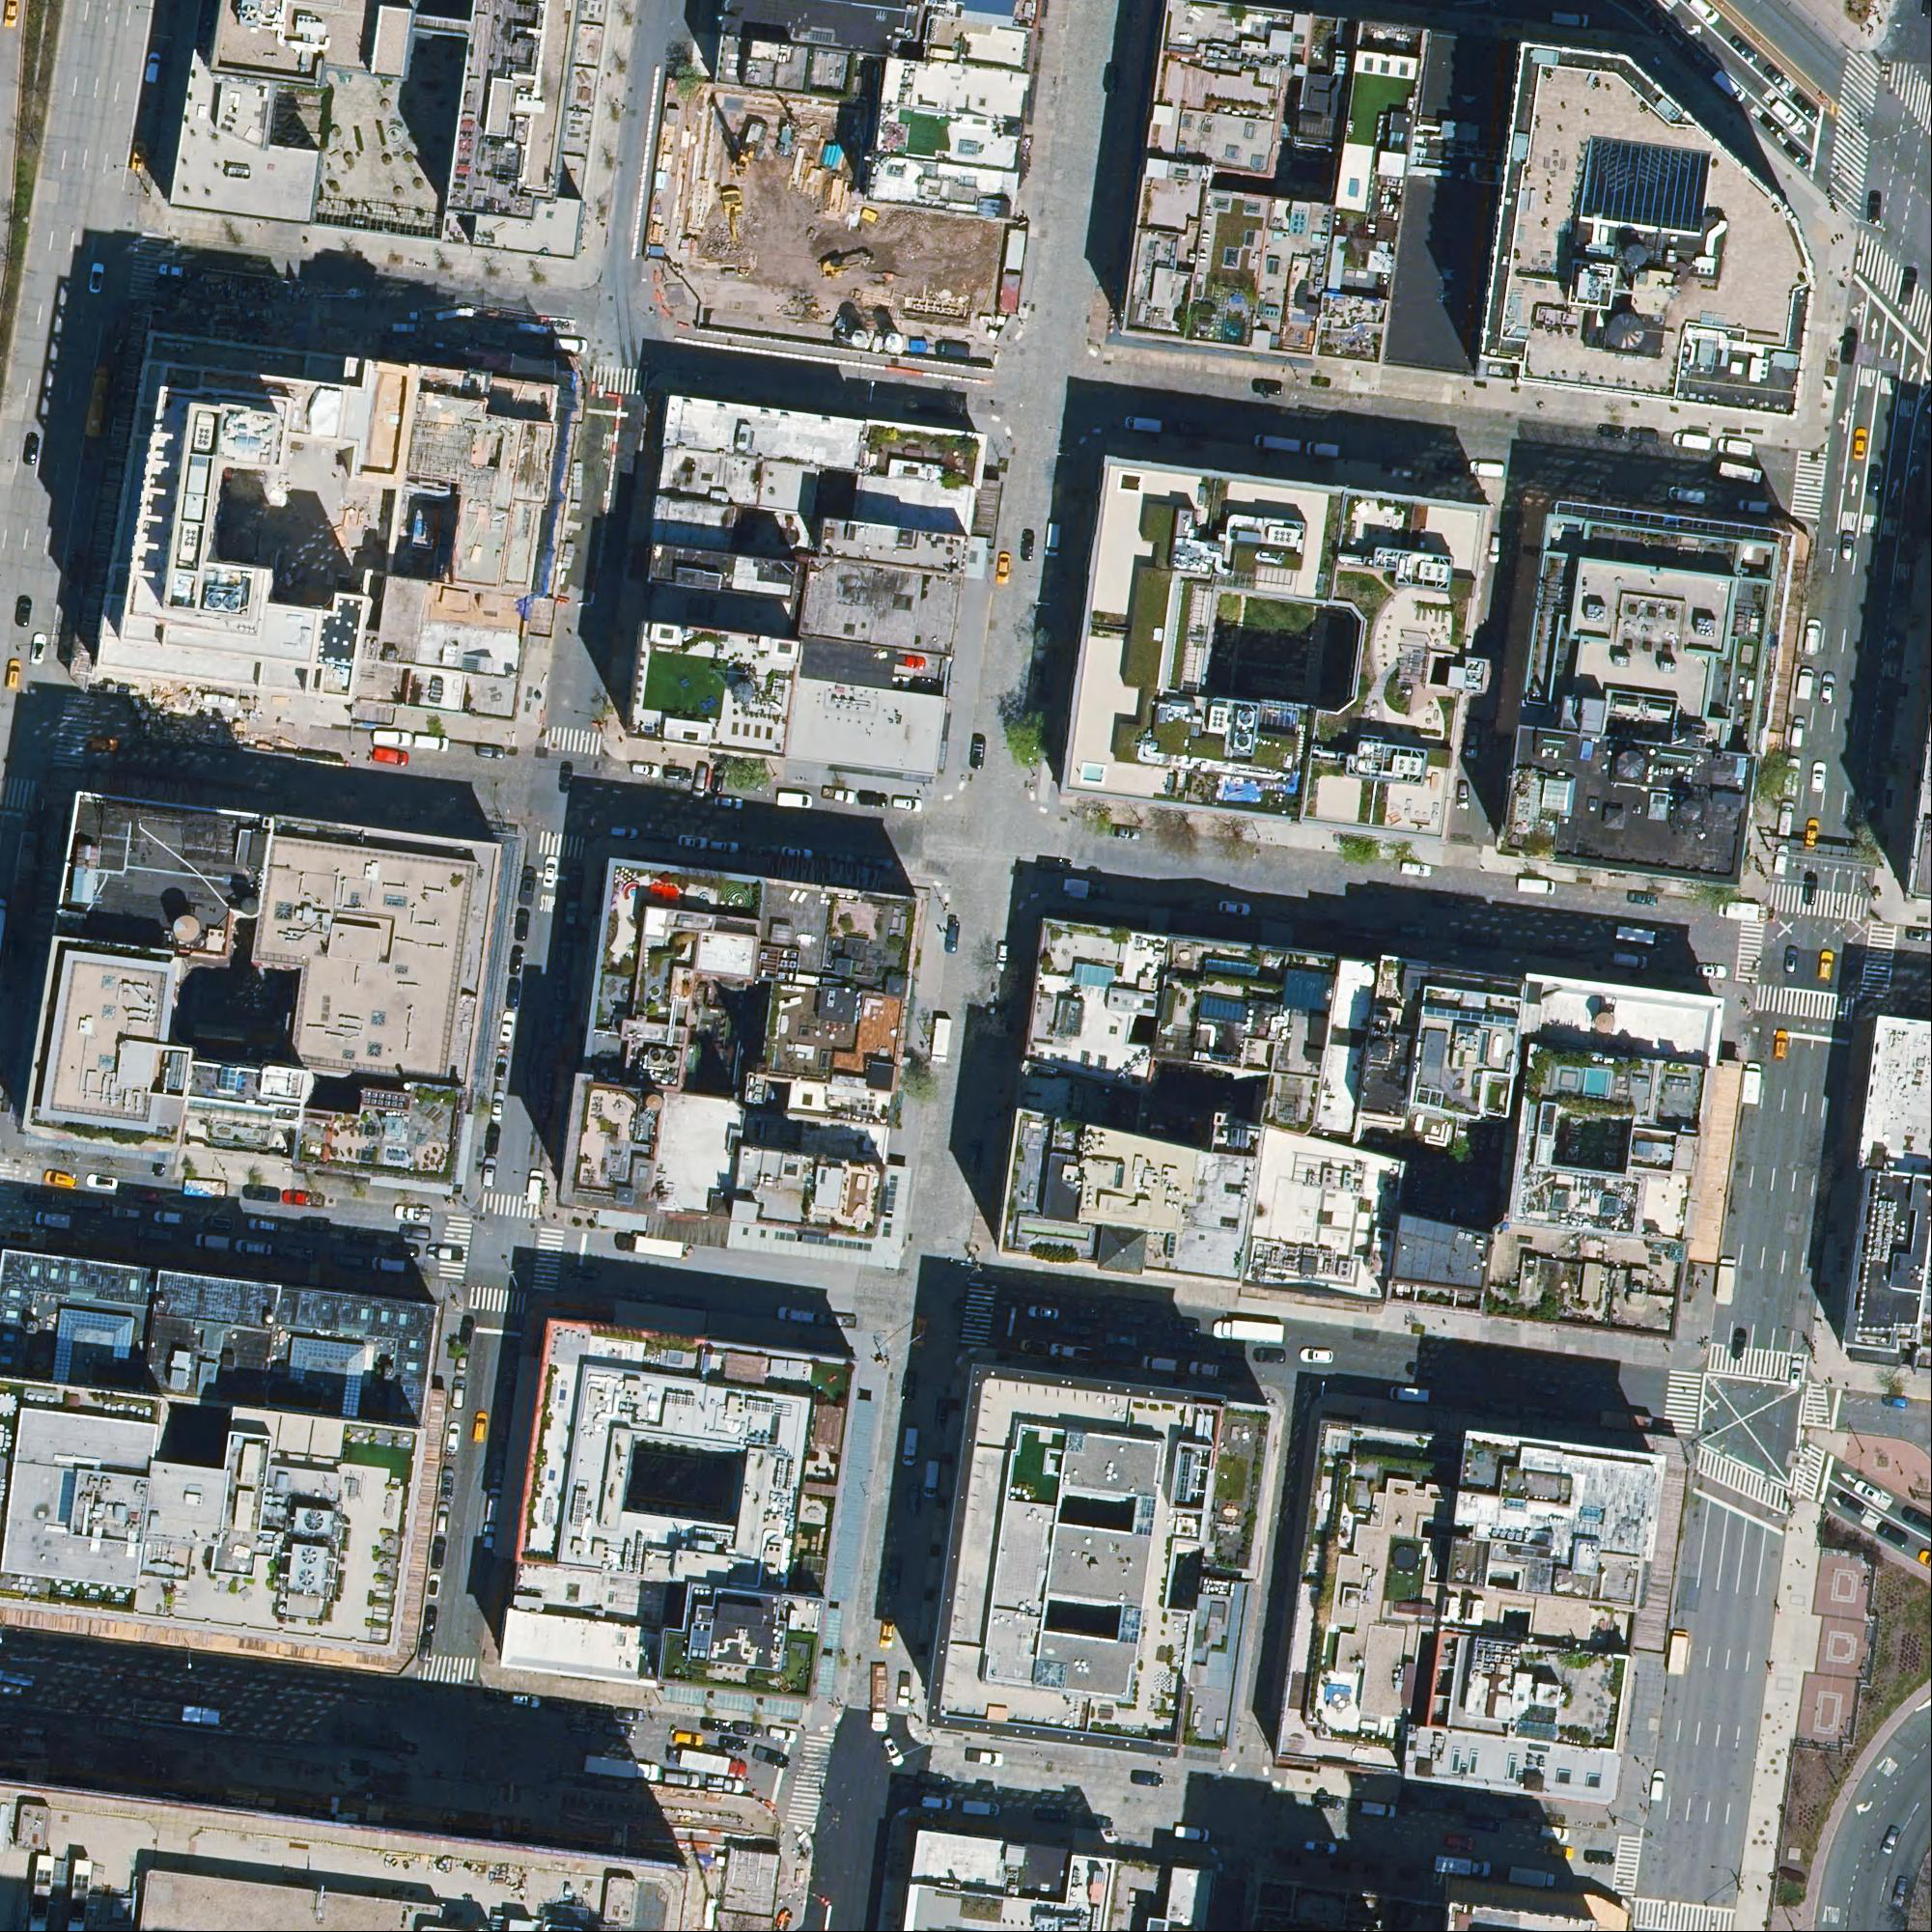

In [19]:
# Requires pillow package --> conda install -c anaconda pillow

from PIL import Image

img = Image.open('12188.jpg')
img

Next, we need to get the feature representation. For this, we use a well known Convolutional Neural Network, Inception-V3, as a feature extractor. The network is pretrained on ImageNet [Imagenet](http://www.image-net.org/)  - a a large-scale dataset of natural images (animals, objects). Despite how far this training set may seem from satellite photos, several studies have shown that the generic descriptors extracted from such convolutional neural networks are very powerful and useful for various visual recognition tasks [[ref.]](https://arxiv.org/abs/1403.6382). 

Using this network, we extract our feature representation output from the first convolutional layer. We use this first layer as we assume this layer to provides the most generic visual image features. This is grounded in the assumption that filters from later layers might already be too specialized in detecting objects within the range of classes present in the Imagenet dataset, and thus returning features that are too specialized for dealing with satellite images.

In more simple terms, it means that we do not want the image descriptors to be specialized in describing a chair, tree or any other class from the Imagenet data. Instead we aim for more general features representing for instance edges and color blobs, which are most likely to be found in the very early convolutional layers of the network. 

#### What follows is code that shows you how you could have extracted the features from the images yourself. The installations can be fussy to get working. If you cannot get it to work, do not worry, it is not mandatory for the assignment. We have provided the pre-extracted feature-set for you in a csv file.

#### Installation notes

To run this code you need to install keras with tensorflow. You could/should set up a new anaconda environment before doing so. First try to install [keras](https://anaconda.org/conda-forge/keras) - tensorflow should install automatically. If tensorflow does not install automatically, then you will need to remove keras, then install [tensorflow](https://anaconda.org/conda-forge/tensorflow) or [tensorflow-gpu](https://anaconda.org/anaconda/tensorflow-gpu) (depending on whether your laptop has an NVIDIA gpu or not). Once tensorflow is installed, you can then install keras, which should then automatically recognizes tensorflow as its backend.* 

*Depending on the NVIDIA driver installed on your laptop, you might need another CUDA toolkit version, which means that you might also need another tensorflow version. This was tried with version 1.12. Further information on compatibilty of NVIDIA driver and CUDA toolkit version can be found [here](https://docs.nvidia.com/deploy/cuda-compatibility/index.html#binary-compatibility). Besides that, the following links provide information on compatibility between tensorflow and CUDA toolkit versions: [Linux/MacOS](https://www.tensorflow.org/install/source#tested_build_configurations), [Windows](https://www.tensorflow.org/install/source_windows#tested_build_configurations).*

#### Running the feature extractor

We start with loading the pre-trained Inception-V3 CNN model.

In [20]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3

# Getting the InceptionV3 model
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(299, 299, 3))
                             
# Selecting the first convolutional layer as the output layer    
out = base_inception.layers[1].output

# Adding a global spatial average pooling layer to reduce the number of features
out = GlobalAveragePooling2D()(out)

model = Model(inputs=base_inception.input, outputs=out)

# Lock model parameters
for layer in base_inception.layers:
    layer.trainable = False
    
# show model summary
model.summary()

Using TensorFlow backend.










_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 32)      864       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
Total params: 864
Trainable params: 0
Non-trainable params: 864
_________________________________________________________________


We see that the output is an array with length 32. These 32 elements represent the global averages of each convolution matrix in the first layer. In other words, the Global Average Pooling operation outputs the  spatial  average  of  each  feature  map. It can be visualized as follows: 

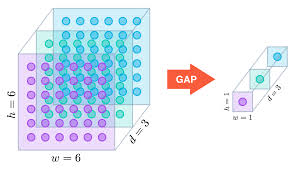

Next we initialize a Model object, which we will use to extract the image features.

In [21]:
extract = Model(model.inputs, model.output)

# Empty dataframe to store the features in
df_visual = pd.DataFrame()

Lastly, we load the image and feed it through the CNN model. We end up with an array as explained above.

In [22]:
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Turning image into an arry
arr = np.array([img_to_array(load_img('12188.jpg', target_size=(299,299)))]).astype('float32')

# Normalizing
arr /= 255.

# Getting the feature vector
features = extract.predict(arr)
print('Image features:\n', features)
print('Array shape:', features.shape)

Image features:
 [[ 0.1142702   0.31959108  0.36081502 -0.75453043  0.05584976  0.79034007
   0.00148785 -0.07917348 -0.11527587  0.00160526 -0.3271745   0.04095082
  -0.04832074  0.08834884 -0.05227735 -0.34756553 -0.5060096   0.01982421
   0.07099893  0.01637543  0.02811686 -0.12625432  0.45789957 -0.37550905
  -0.03540013 -0.06302017  0.3255438   0.53773266 -0.41777772 -0.40905815
   0.27863538 -0.08129292]]
Array shape: (1, 32)


In [23]:
# Adding the features into the dataframe

df_visual = df_visual.append(pd.DataFrame(features))
df_visual.head()

0         1         2        3        4        5         6         7   \
0  0.11427  0.319591  0.360815 -0.75453  0.05585  0.79034  0.001488 -0.079173   

         8         9   ...      22        23      24       25        26  \
0 -0.115276  0.001605  ...  0.4579 -0.375509 -0.0354 -0.06302  0.325544   

         27        28        29        30        31  
0  0.537733 -0.417778 -0.409058  0.278635 -0.081293  

[1 rows x 32 columns]

## Visual data extracted for (almost) all houses

We performed feature extraction for almost all houses in the sales dataset and stored the final dataframe in a .csv file. The only houses not confisered were found to lie outside the geographic bounds of the image raster and have therefore could not be considered. The .csv file also contains the sale and building IDs so you can match them to the house prices dataset.

See the final .csv file below.

In [24]:
df_img = pd.read_csv('sales_data_2015_DF-inception-conv.csv', index_col=0)
df_img.head()

Sale_id   bbl_id         0         1         2         3         4  \
0        1  2290528  0.141194  0.421060  0.466694 -0.989387  0.091223   
1        2  2290528  0.141194  0.421060  0.466694 -0.989387  0.091223   
2        3   230352  0.114756  0.350338  0.387500 -0.834070  0.063190   
3        4  2303936  0.114901  0.351911  0.388062 -0.835415  0.068941   
4        5  2303936  0.114901  0.351911  0.388062 -0.835415  0.068941   

          5         6         7  ...        22        23        24        25  \
0  1.033919 -0.001966 -0.098034  ...  0.600213 -0.493792 -0.047002 -0.092415   
1  1.033919 -0.001966 -0.098034  ...  0.600213 -0.493792 -0.047002 -0.092415   
2  0.863413 -0.001232 -0.084781  ...  0.502646 -0.414158 -0.037535 -0.060672   
3  0.867273 -0.001948 -0.082643  ...  0.503530 -0.413901 -0.038112 -0.066762   
4  0.867273 -0.001948 -0.082643  ...  0.503530 -0.413901 -0.038112 -0.066762   

         26        27        28        29        30        31  
0  0.427163  0.688372 -0.549481 -0.538056  0.358792 -0.103146  
1  0.427163  0.688372 -0.549481 -0.538056  0.358792 -0.103146  
2  0.358382  0.585332 -0.458778 -0.447776  0.301268 -0.086599  
3  0.358489  0.580582 -0.461086 -0.449793  0.301751 -0.086144  
4  0.358489  0.580582 -0.461086 -0.449793  0.301751 -0.086144  

[5 rows x 34 columns]

In [25]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84302 entries, 0 to 84301
Data columns (total 34 columns):
Sale_id    84302 non-null int64
bbl_id     84302 non-null int64
0          84302 non-null float64
1          84302 non-null float64
2          84302 non-null float64
3          84302 non-null float64
4          84302 non-null float64
5          84302 non-null float64
6          84302 non-null float64
7          84302 non-null float64
8          84302 non-null float64
9          84302 non-null float64
10         84302 non-null float64
11         84302 non-null float64
12         84302 non-null float64
13         84302 non-null float64
14         84302 non-null float64
15         84302 non-null float64
16         84302 non-null float64
17         84302 non-null float64
18         84302 non-null float64
19         84302 non-null float64
20         84302 non-null float64
21         84302 non-null float64
22         84302 non-null float64
23         84302 non-null float64
24         

### To do:

The first thing to do is to combine these visual features into the original house price dataframe. You are then ready to test if visual features from satellite imagery is useful for discovering property prices in this dataset, and exactly how useful. You are free to try different models, data-splits and use more data from outside that provided.

### End

If you got to this point, you finished the last werkcollege notebook, congratulations. The last assignment is based on this dataset and will appear through Canvas later this week (week 41, sixth week). The final werkcollege time slots next week (week 42, seventh week) next will be for open questions relating to this final assignment.